In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

# From Model to Production

The six lines of code we saw in <<chapter_intro>> are just one small part of the process of using deep learning in practice. In this chapter, we're going to use a computer vision example to look at the end-to-end process of creating a deep learning application. More specifically, we're going to build a bear classifier! In the process, we'll discuss the capabilities and constraints of deep learning, explore how to create datasets, look at possible gotchas when using deep learning in practice, and more. Many of the key points will apply equally well to other deep learning problems, such as those in <<chapter_intro>>. If you work through a problem similar in key respects to our example problems, we expect you to get excellent results with little code, quickly.

Let's start with how you should frame your problem.

## The Practice of Deep Learning

We've seen that deep learning can solve a lot of challenging problems quickly and with little code. As a beginner, there's a sweet spot of problems that are similar enough to our example problems that you can very quickly get extremely useful results. However, deep learning isn't magic! The same 6 lines of code won't work for every problem anyone can think of today. Underestimating the constraints and overestimating the capabilities of deep learning may lead to frustratingly poor results, at least until you gain some experience and can solve the problems that arise. Conversely, overestimating the constraints and underestimating the capabilities of deep learning may mean you do not attempt a solvable problem because you talk yourself out of it. 

We often talk to people who underestimate both the constraints and the capabilities of deep learning. Both of these can be problems: underestimating the capabilities means that you might not even try things that could be very beneficial, and underestimating the constraints might mean that you fail to consider and react to important issues.

The best thing to do is to keep an open mind. If you remain open to the possibility that deep learning might solve part of your problem with less data or complexity than you expect, then it is possible to design a process where you can find the specific capabilities and constraints related to your particular problem as you work through the process. This doesn't mean making any risky bets — we will show you how you can gradually roll out models so that they don't create significant risks, and can even backtest them prior to putting them in production.

### Starting Your Project

So where should you start your deep learning journey? The most important thing is to ensure that you have some project to work on—it is only through working on your own projects that you will get real experience building and using models. When selecting a project, the most important consideration is data availability. Regardless of whether you are doing a project just for your own learning or for practical application in your organization, you want something where you can get started quickly. We have seen many students, researchers, and industry practitioners waste months or years while they attempt to find their perfect dataset. The goal is not to find the "perfect" dataset or project, but just to get started and iterate from there.

If you take this approach, then you will be on your third iteration of learning and improving while the perfectionists are still in the planning stages!

We also suggest that you iterate from end to end in your project; that is, don't spend months fine-tuning your model, or polishing the perfect GUI, or labelling the perfect dataset… Instead, complete every step as well as you can in a reasonable amount of time, all the way to the end. For instance, if your final goal is an application that runs on a mobile phone, then that should be what you have after each iteration. But perhaps in the early iterations you take some shortcuts, for instance by doing all of the processing on a remote server, and using a simple responsive web application. By completing the project end to end, you will see where the trickiest bits are, and which bits make the biggest difference to the final result.

As you work through this book, we suggest that you complete lots of small experiments, by running and adjusting the notebooks we provide, at the same time that you gradually develop your own projects. That way, you will be getting experience with all of the tools and techniques that we're explaining, as we discuss them.

> s: To make the most of this book, take the time to experiment between each chapter, be it on your own project or by exploring the notebooks we provide. Then try rewriting those notebooks from scratch on a new dataset. It's only by practicing (and failing) a lot that you will get an intuition of how to train a model.  

By using the end-to-end iteration approach you will also get a better understanding of how much data you really need. For instance, you may find you can only easily get 200 labeled data items, and you can't really know until you try whether that's enough to get the performance you need for your application to work well in practice.

In an organizational context you will be able to show your colleagues that your idea can really work by showing them a real working prototype. We have repeatedly observed that this is the secret to getting good organizational buy-in for a project.

Since it is easiest to get started on a project where you already have data available, that means it's probably easiest to get started on a project related to something you are already doing, because you already have data about things that you are doing. For instance, if you work in the music business, you may have access to many recordings. If you work as a radiologist, you probably have access to lots of medical images. If you are interested in wildlife preservation, you may have access to lots of images of wildlife.

Sometimes, you have to get a bit creative. Maybe you can find some previous machine learning project, such as a Kaggle competition, that is related to your field of interest. Sometimes, you have to compromise. Maybe you can't find the exact data you need for the precise project you have in mind; but you might be able to find something from a similar domain, or measured in a different way, tackling a slightly different problem. Working on these kinds of similar projects will still give you a good understanding of the overall process, and may help you identify other shortcuts, data sources, and so forth.

Especially when you are just starting out with deep learning, it's not a good idea to branch out into very different areas, to places that deep learning has not been applied to before. That's because if your model does not work at first, you will not know whether it is because you have made a mistake, or if the very problem you are trying to solve is simply not solvable with deep learning. And you won't know where to look to get help. Therefore, it is best at first to start with something where you can find an example online where somebody has had good results with something that is at least somewhat similar to what you are trying to achieve, or where you can convert your data into a format similar to what someone else has used before (such as creating an image from your data). Let's have a look at the state of deep learning, just so you know what kinds of things deep learning is good at right now.

### The State of Deep Learning

Let's start by considering whether deep learning can be any good at the problem you are looking to work on. This section provides a summary of the state of deep learning at the start of 2020. However, things move very fast, and by the time you read this some of these constraints may no longer exist. We will try to keep the [book's website](https://book.fast.ai/) up-to-date; in addition, a Google search for "what can AI do now" is likely to provide current information.

#### Computer vision

There are many domains in which deep learning has not been used to analyze images yet, but those where it has been tried have nearly universally shown that computers can recognize what items are in an image at least as well as people can—even specially trained people, such as radiologists. This is known as *object recognition*. Deep learning is also good at recognizing where objects in an image are, and can highlight their locations and name each found object. This is known as *object detection* (there is also a variant of this that we saw in <<chapter_intro>>, where every pixel is categorized based on what kind of object it is part of—this is called *segmentation*). Deep learning algorithms are generally not good at recognizing images that are significantly different in structure or style to those used to train the model. For instance, if there were no black-and-white images in the training data, the model may do poorly on black-and-white images. Similarly, if the training data did not contain hand-drawn images, then the model will probably do poorly on hand-drawn images. There is no general way to check what types of images are missing in your training set, but we will show in this chapter some ways to try to recognize when unexpected image types arise in the data when the model is being used in production (this is known as checking for *out-of-domain* data).

One major challenge for object detection systems is that image labelling can be slow and expensive. There is a lot of work at the moment going into tools to try to make this labelling faster and easier, and to require fewer handcrafted labels to train accurate object detection models. One approach that is particularly helpful is to synthetically generate variations of input images, such as by rotating them or changing their brightness and contrast; this is called *data augmentation* and also works well for text and other types of models. We will be discussing it in detail in this chapter.

Another point to consider is that although your problem might not look like a computer vision problem, it might be possible with a little imagination to turn it into one. For instance, if what you are trying to classify are sounds, you might try converting the sounds into images of their acoustic waveforms and then training a model on those images.

#### Text (natural language processing)

Computers are very good at classifying both short and long documents based on categories such as spam or not spam, sentiment (e.g., is the review positive or negative), author, source website, and so forth. We are not aware of any rigorous work done in this area to compare them to humans, but anecdotally it seems to us that deep learning performance is similar to human performance on these tasks. Deep learning is also very good at generating context-appropriate text, such as replies to social media posts, and imitating a particular author's style. It's good at making this content compelling to humans too—in fact, even more compelling than human-generated text. However, deep learning is currently not good at generating *correct* responses! We don't currently have a reliable way to, for instance, combine a knowledge base of medical information with a deep learning model for generating medically correct natural language responses. This is very dangerous, because it is so easy to create content that appears to a layman to be compelling, but actually is entirely incorrect.

Another concern is that context-appropriate, highly compelling responses on social media could be used at massive scale—thousands of times greater than any troll farm previously seen—to spread disinformation, create unrest, and encourage conflict. As a rule of thumb, text generation models will always be technologically a bit ahead of models recognizing automatically generated text. For instance, it is possible to use a model that can recognize artificially generated content to actually improve the generator that creates that content, until the classification model is no longer able to complete its task.

Despite these issues, deep learning has many applications in NLP: it can be used to translate text from one language to another, summarize long documents into something that can be digested more quickly, find all mentions of a concept of interest, and more. Unfortunately, the translation or summary could well include completely incorrect information! However, the performance is already good enough that many people are using these systems—for instance, Google's online translation system (and every other online service we are aware of) is based on deep learning.

#### Combining text and images

The ability of deep learning to combine text and images into a single model is, generally, far better than most people intuitively expect. For example, a deep learning model can be trained on input images with output captions written in English, and can learn to generate surprisingly appropriate captions automatically for new images! But again, we have the same warning that we discussed in the previous section: there is no guarantee that these captions will actually be correct.

Because of this serious issue, we generally recommend that deep learning be used not as an entirely automated process, but as part of a process in which the model and a human user interact closely. This can potentially make humans orders of magnitude more productive than they would be with entirely manual methods, and actually result in more accurate processes than using a human alone. For instance, an automatic system can be used to identify potential stroke victims directly from CT scans, and send a high-priority alert to have those scans looked at quickly. There is only a three-hour window to treat strokes, so this fast feedback loop could save lives. At the same time, however, all scans could continue to be sent to radiologists in the usual way, so there would be no reduction in human input. Other deep learning models could automatically measure items seen on the scans, and insert those measurements into reports, warning the radiologists about findings that they may have missed, and telling them about other cases that might be relevant.

#### Tabular data

For analyzing time series and tabular data, deep learning has recently been making great strides. However, deep learning is generally used as part of an ensemble of multiple types of model. If you already have a system that is using random forests or gradient boosting machines (popular tabular modeling tools that you will learn about soon), then switching to or adding deep learning may not result in any dramatic improvement. Deep learning does greatly increase the variety of columns that you can include—for example, columns containing natural language (book titles, reviews, etc.), and high-cardinality categorical columns (i.e., something that contains a large number of discrete choices, such as zip code or product ID). On the down side, deep learning models generally take longer to train than random forests or gradient boosting machines, although this is changing thanks to libraries such as [RAPIDS](https://rapids.ai/), which provides GPU acceleration for the whole modeling pipeline. We cover the pros and cons of all these methods in detail in <<chapter_tabular>>.

#### Recommendation systems

Recommendation systems are really just a special type of tabular data. In particular, they generally have a high-cardinality categorical variable representing users, and another one representing products (or something similar). A company like Amazon represents every purchase that has ever been made by its customers as a giant sparse matrix, with customers as the rows and products as the columns. Once they have the data in this format, data scientists apply some form of collaborative filtering to *fill in the matrix*. For example, if customer A buys products 1 and 10, and customer B buys products 1, 2, 4, and 10, the engine will recommend that A buy 2 and 4. Because deep learning models are good at handling high-cardinality categorical variables, they are quite good at handling recommendation systems. They particularly come into their own, just like for tabular data, when combining these variables with other kinds of data, such as natural language or images. They can also do a good job of combining all of these types of information with additional metadata represented as tables, such as user information, previous transactions, and so forth.

However, nearly all machine learning approaches have the downside that they only tell you what products a particular user might like, rather than what recommendations would be helpful for a user. Many kinds of recommendations for products a user might like may not be at all helpful—for instance, if the user is already familiar with the products, or if they are simply different packagings of products they have already purchased (such as a boxed set of novels, when they already have each of the items in that set). Jeremy likes reading books by Terry Pratchett, and for a while Amazon was recommending nothing but Terry Pratchett books to him (see <<pratchett>>), which really wasn't helpful because he already was aware of these books!

<img alt="Terry Pratchett books recommendation" caption="A not-so-useful recommendation" id="pratchett" src="images/pratchett.png">

#### Other data types

Often you will find that domain-specific data types fit very nicely into existing categories. For instance, protein chains look a lot like natural language documents, in that they are long sequences of discrete tokens with complex relationships and meaning throughout the sequence. And indeed, it does turn out that using NLP deep learning methods is the current state-of-the-art approach for many types of protein analysis. As another example, sounds can be represented as spectrograms, which can be treated as images; standard deep learning approaches for images turn out to work really well on spectrograms.

### The Drivetrain Approach

There are many accurate models that are of no use to anyone, and many inaccurate models that are highly useful. To ensure that your modeling work is useful in practice, you need to consider how your work will be used. In 2012 Jeremy, along with Margit Zwemer and Mike Loukides, introduced a method called *the Drivetrain Approach* for thinking about this issue.

The Drivetrain Approach, illustrated in <<drivetrain>>, was described in detail in ["Designing Great Data Products"](https://www.oreilly.com/radar/drivetrain-approach-data-products/). The basic idea is to start with considering your objective, then think about what actions you can take to meet that objective and what data you have (or can acquire) that can help, and then build a model that you can use to determine the best actions to take to get the best results in terms of your objective.

<img src="images/drivetrain-approach.png" id="drivetrain" caption="The Drivetrain Approach">

Consider a model in an autonomous vehicle: you want to help a car drive safely from point A to point B without human intervention. Great predictive modeling is an important part of the solution, but it doesn't stand on its own; as products become more sophisticated, it disappears into the plumbing. Someone using a self-driving car is completely unaware of the hundreds (if not thousands) of models and the petabytes of data that make it work. But as data scientists build increasingly sophisticated products, they need a systematic design approach.

We use data not just to generate more data (in the form of predictions), but to produce *actionable outcomes*. That is the goal of the Drivetrain Approach. Start by defining a clear *objective*. For instance, Google, when creating their first search engine, considered "What is the user’s main objective in typing in a search query?" This led them to their objective, which was to "show the most relevant search result." The next step is to consider what *levers* you can pull (i.e., what actions you can take) to better achieve that objective. In Google's case, that was the ranking of the search results. The third step was to consider what new *data* they would need to produce such a ranking; they realized that the implicit information regarding which pages linked to which other pages could be used for this purpose. Only after these first three steps do we begin thinking about building the predictive *models*. Our objective and available levers, what data we already have and what additional data we will need to collect, determine the models we can build. The models will take both the levers and any uncontrollable variables as their inputs; the outputs from the models can be combined to predict the final state for our objective.

Let's consider another example: recommendation systems. The *objective* of a recommendation engine is to drive additional sales by surprising and delighting the customer with recommendations of items they would not have purchased without the recommendation. The *lever* is the ranking of the recommendations. New *data* must be collected to generate recommendations that will *cause new sales*. This will require conducting many randomized experiments in order to collect data about a wide range of recommendations for a wide range of customers. This is a step that few organizations take; but without it, you don't have the information you need to actually optimize recommendations based on your true objective (more sales!).

Finally, you could build two *models* for purchase probabilities, conditional on seeing or not seeing a recommendation. The difference between these two probabilities is a utility function for a given recommendation to a customer. It will be low in cases where the algorithm recommends a familiar book that the customer has already rejected (both components are small) or a book that they would have bought even without the recommendation (both components are large and cancel each other out).

As you can see, in practice often the practical implementation of your models will require a lot more than just training a model! You'll often need to run experiments to collect more data, and consider how to incorporate your models into the overall system you're developing. Speaking of data, let's now focus on how to find data for your project.

## Gathering Data

For many types of projects, you may be able to find all the data you need online. The project we'll be completing in this chapter is a *bear detector*. It will discriminate between three types of bear: grizzly, black, and teddy bears. There are many images on the internet of each type of bear that we can use. We just need a way to find them and download them. We've provided a tool you can use for this purpose, so you can follow along with this chapter and create your own image recognition application for whatever kinds of objects you're interested in. In the fast.ai course, thousands of students have presented their work in the course forums, displaying everything from hummingbird varieties in Trinidad to bus types in Panama—one student even created an application that would help his fiancée recognize his 16 cousins during Christmas vacation!

At the time of writing, Bing Image Search is the best option we know of for finding and downloading images. It's free for up to 1,000 queries per month, and each query can download up to 150 images. However, something better might have come along between when we wrote this and when you're reading the book, so be sure to check out the [book's website](https://book.fast.ai/) for our current recommendation.

> important: Keeping in Touch With the Latest Services: Services that can be used for creating datasets come and go all the time, and their features, interfaces, and pricing change regularly too. In this section, we'll show how to use the Bing Image Search API available as part of Azure Cognitive Services at the time this book was written. We'll be providing more options and more up to date information on the [book's website](https://book.fast.ai/), so be sure to have a look there now to get the most current information on how to download images from the web to create a dataset for deep learning.

# clean
To download images with Bing Image Search, sign up at Microsoft for a free account. You will be given a key, which you can copy and enter in a cell as follows (replacing 'XXX' with your key and executing it):

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY', '74fb42fcbad74753930bcd568a47b2dc')

Or, if you're comfortable at the command line, you can set it in your terminal with:

    export AZURE_SEARCH_KEY=your_key_here

and then restart Jupyter Notebook, and use the above line without editing it.

Once you've set `key`, you can use `search_images_bing`. This function is provided by the small `utils` class included with the notebooks online. If you're not sure where a function is defined, you can just type it in your notebook to find out:

In [4]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128)>

In [24]:
results = search_images_bing(key, 'indian temple')
ims = results.attrgot('content_url')
len(ims)

150

In [25]:
ims

(#150) ['http://4.bp.blogspot.com/-FYuhDXBTQG0/UkUgmQ9af-I/AAAAAAAAHaE/i3t3h3Hb4qE/s1600/2.+Nadi+Hindu+Temple++-+12.jpg','http://3.bp.blogspot.com/-Qpi_w1O6BHo/UkUgIR2Un-I/AAAAAAAAHZ0/Rk8TzV-whcw/s1600/2.+Nadi+Hindu+Temple++-+11.jpg','http://3.bp.blogspot.com/-f-tuLpOoSO4/UMb3bIuC2nI/AAAAAAAASnQ/SRnYJNbQd90/s1600/2%2Btemple.jpg','http://4.bp.blogspot.com/-bJKaU3iTHh4/VAda2OyTqfI/AAAAAAAAG9Q/Er-3kCfpwMc/s1600/Brihadeshwara%2BTemple.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Malibu_Hindu_Temple_25.jpg/1200px-Malibu_Hindu_Temple_25.jpg','https://cairnscommunications.files.wordpress.com/2017/01/fiji-temple.jpg?w=887','https://i.ytimg.com/vi/ZguNi_AYk_c/maxresdefault.jpg','http://3.bp.blogspot.com/-C4Utcw8WBJM/VAdbYwqKIfI/AAAAAAAAG_Y/mLHWyd5bKa4/s1600/Rajarani_Temple%2Bindia.jpg','http://s04.sonyaandtravis.com/images/india-2012/khajuraho-india-western-temples-2-lakshmana-temple-a-hindu-temple-dedicated-to-vishnu.jpg','https://upload.wikimedia.org/wikipedia/commons/thumb

We've successfully downloaded the URLs of 150 grizzly bears (or, at least, images that Bing Image Search finds for that search term). Let's look at one:

In [26]:
#hide
#ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [42]:
dest = 'images/indianTemple.jpg'
download_url(ims[0], dest)

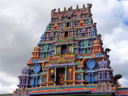

In [43]:
im = Image.open(dest)
im.to_thumb(128,128)

This seems to have worked nicely, so let's use fastai's `download_images` to download all the URLs for each of our search terms. We'll put each in a separate folder:

In [44]:
worhip_types = 'church','indian temple','mosque'
path = Path('worship')

In [45]:
if not path.exists():
    path.mkdir()
    for o in worhip_places:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o}')
        print(results)
        download_images(dest, urls=results.attrgot('content_url'))

(#150) [<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298dfcedc0>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cfa5040>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cfa59a0>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf3a9a0>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf3a760>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf3ac10>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf3a6a0>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf3a7c0>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf3a1c0>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object a

(#150) [<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf879d0>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf87670>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf35190>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf35970>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf35610>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf8c9d0>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf8cfa0>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf8c160>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf8c760>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object a

(#150) [<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf773a0>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf77700>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf77bb0>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf77e80>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf77be0>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf77580>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf77fa0>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf77430>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object at 0x7f298cf77cd0>,<azure.cognitiveservices.search.imagesearch.models._models_py3.ImageObject object a

In [37]:
!ls

01_intro.ipynb		 12_nlp_dive.ipynb	README_ko.md
02_production.ipynb	 13_convolutions.ipynb	app_blog.ipynb
03_ethics.ipynb		 14_resnet.ipynb	app_jupyter.ipynb
04_mnist_basics.ipynb	 15_arch_details.ipynb	clean
05_pet_breeds.ipynb	 16_accel_sgd.ipynb	environment.yml
06_multicat.ipynb	 17_foundations.ipynb	images
07_sizing_and_tta.ipynb  18_CAM.ipynb		requirements.txt
08_collab.ipynb		 19_learner.ipynb	settings.ini
09_tabular.ipynb	 20_conclusion.ipynb	tools
10_nlp.ipynb		 LICENSE		utils.py
11_midlevel_data.ipynb	 README.md		worship


Our folder has image files, as we'd expect:

In [46]:
fns = get_image_files(path)
fns

(#448) [Path('worship/church/00000003.jpg'),Path('worship/church/00000004.jpg'),Path('worship/church/00000002.jpg'),Path('worship/church/00000001.jpg'),Path('worship/church/00000000.jpg'),Path('worship/church/00000009.JPG'),Path('worship/church/00000011.jpg'),Path('worship/church/00000008.JPG'),Path('worship/church/00000005.jpg'),Path('worship/church/00000010.jpg')...]

> j: I just love this about working in Jupyter notebooks! It's so easy to gradually build what I want, and check my work every step of the way. I make a _lot_ of mistakes, so this is really helpful to me...

Often when we download files from the internet, there are a few that are corrupt. Let's check:

In [47]:
failed = verify_images(fns)
failed

(#6) [Path('worship/church/00000019.jpg'),Path('worship/church/00000054.jpg'),Path('worship/indian temple/00000014.jpg'),Path('worship/indian temple/00000095.jpg'),Path('worship/indian temple/00000106.jpg'),Path('worship/indian temple/00000131.jpg')]

In [48]:
??verify_images

To remove all the failed images, you can use `unlink` on each of them. Note that, like most fastai functions that return a collection, `verify_images` returns an object of type `L`, which includes the `map` method. This calls the passed function on each element of the collection:

In [49]:
failed.map(Path.unlink);

### Sidebar: Getting Help in Jupyter Notebooks

Jupyter notebooks are great for experimenting and immediately seeing the results of each function, but there is also a lot of functionality to help you figure out how to use different functions, or even directly look at their source code. For instance, if you type in a cell:
```
??verify_images
```
a window will pop up with:
```
Signature: verify_images(fns)
Source:   
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in
             enumerate(parallel(verify_image, fns)) if not o)
File:      ~/git/fastai/fastai/vision/utils.py
Type:      function
```
This tells us what argument the function accepts (`fns`), then shows us the source code and the file it comes from. Looking at that source code, we can see it applies the function `verify_image` in parallel and only keeps the image files for which the result of that function is `False`, which is consistent with the doc string: it finds the images in `fns` that can't be opened.

Here are some other features that are very useful in Jupyter notebooks:

- At any point, if you don't remember the exact spelling of a function or argument name, you can press Tab to get autocompletion suggestions.
- When inside the parentheses of a function, pressing Shift and Tab simultaneously will display a window with the signature of the function and a short description. Pressing these keys twice will expand the documentation, and pressing them three times will open a full window with the same information at the bottom of your screen.
- In a cell, typing `?func_name` and executing will open a window with the signature of the function and a short description.
- In a cell, typing `??func_name` and executing will open a window with the signature of the function, a short description, and the source code.
- If you are using the fastai library, we added a `doc` function for you: executing `doc(func_name)` in a cell will open a window with the signature of the function, a short description and links to the source code on GitHub and the full documentation of the function in the [library docs](https://docs.fast.ai).
- Unrelated to the documentation but still very useful: to get help at any point if you get an error, type `%debug` in the next cell and execute to open the [Python debugger](https://docs.python.org/3/library/pdb.html), which will let you inspect the content of every variable.

### End sidebar

One thing to be aware of in this process: as we discussed in <<chapter_intro>>, models can only reflect the data used to train them. And the world is full of biased data, which ends up reflected in, for example, Bing Image Search (which we used to create our dataset). For instance, let's say you were interested in creating an app that could help users figure out whether they had healthy skin, so you trained a model on the results of searches for (say) "healthy skin." <<healthy_skin>> shows you the kinds of results you would get.

<img src="images/healthy_skin.gif" width="600" caption="Data for a healthy skin detector?" id="healthy_skin">

With this as your training data, you would end up not with a healthy skin detector, but a *young white woman touching her face* detector! Be sure to think carefully about the types of data that you might expect to see in practice in your application, and check carefully to ensure that all these types are reflected in your model's source data. footnote:[Thanks to Deb Raji, who came up with the "healthy skin" example. See her paper ["Actionable Auditing: Investigating the Impact of Publicly Naming Biased Performance Results of Commercial AI Products"](https://dl.acm.org/doi/10.1145/3306618.3314244) for more fascinating insights into model bias.]

Now that we have downloaded some data, we need to assemble it in a format suitable for model training. In fastai, that means creating an object called `DataLoaders`.

## From Data to DataLoaders

`DataLoaders` is a thin class that just stores whatever `DataLoader` objects you pass to it, and makes them available as `train` and `valid`. Although it's a very simple class, it's very important in fastai: it provides the data for your model. The key functionality in `DataLoaders` is provided with just these four lines of code (it has some other minor functionality we'll skip over for now):

```python
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])
```

> jargon: DataLoaders: A fastai class that stores multiple `DataLoader` objects you pass to it, normally a `train` and a `valid`, although it's possible to have as many as you like. The first two are made available as properties.

Later in the book you'll also learn about the `Dataset` and `Datasets` classes, which have the same relationship.

To turn our downloaded data into a `DataLoaders` object we need to tell fastai at least four things:

- What kinds of data we are working with
- How to get the list of items
- How to label these items
- How to create the validation set

So far we have seen a number of *factory methods* for particular combinations of these things, which are convenient when you have an application and data structure that happen to fit into those predefined methods. For when you don't, fastai has an extremely flexible system called the *data block API*. With this API you can fully customize every stage of the creation of your `DataLoaders`. Here is what we need to create a `DataLoaders` for the dataset that we just downloaded:

In [50]:
worships = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

Let's look at each of these arguments in turn. First we provide a tuple where we specify what types we want for the independent and dependent variables: 

```python
blocks=(ImageBlock, CategoryBlock)
```

The *independent variable* is the thing we are using to make predictions from, and the *dependent variable* is our target. In this case, our independent variables are images, and our dependent variables are the categories (type of bear) for each image. We will see many other types of block in the rest of this book.

For this `DataLoaders` our underlying items will be file paths. We have to tell fastai how to get a list of those files. The `get_image_files` function takes a path, and returns a list of all of the images in that path (recursively, by default):

```python
get_items=get_image_files
```

Often, datasets that you download will already have a validation set defined. Sometimes this is done by placing the images for the training and validation sets into different folders. Sometimes it is done by providing a CSV file in which each filename is listed along with which dataset it should be in. There are many ways that this can be done, and fastai provides a very general approach that allows you to use one of its predefined classes for this, or to write your own. In this case, however, we simply want to split our training and validation sets randomly. However, we would like to have the same training/validation split each time we run this notebook, so we fix the random seed (computers don't really know how to create random numbers at all, but simply create lists of numbers that look random; if you provide the same starting point for that list each time—called the *seed*—then you will get the exact same list each time):


```python
splitter=RandomSplitter(valid_pct=0.2, seed=42)
```

The independent variable is often referred to as `x` and the dependent variable is often referred to as `y`. Here, we are telling fastai what function to call to create the labels in our dataset:

```python
get_y=parent_label
```

`parent_label` is a function provided by fastai that simply gets the name of the folder a file is in. Because we put each of our bear images into folders based on the type of bear, this is going to give us the labels that we need.

Our images are all different sizes, and this is a problem for deep learning: we don't feed the model one image at a time but several of them (what we call a *mini-batch*). To group them in a big array (usually called a *tensor*) that is going to go through our model, they all need to be of the same size. So, we need to add a transform which will resize these images to the same size. *Item transforms* are pieces of code that run on each individual item, whether it be an image, category, or so forth. fastai includes many predefined transforms; we use the `Resize` transform here:

```python
item_tfms=Resize(128)
```

This command has given us a `DataBlock` object. This is like a *template* for creating a `DataLoaders`. We still need to tell fastai the actual source of our data—in this case, the path where the images can be found:

In [51]:
dls = worships.dataloaders(path)

A `DataLoaders` includes validation and training `DataLoader`s. `DataLoader` is a class that provides batches of a few items at a time to the GPU. We'll be learning a lot more about this class in the next chapter. When you loop through a `DataLoader` fastai will give you 64 (by default) items at a time, all stacked up into a single tensor. We can take a look at a few of those items by calling the `show_batch` method on a `DataLoader`:

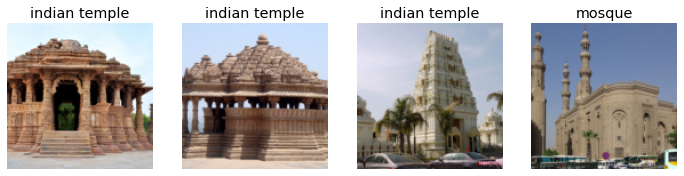

In [52]:
dls.valid.show_batch(max_n=4, nrows=1)

By default `Resize` *crops* the images to fit a square shape of the size requested, using the full width or height. This can result in losing some important details. Alternatively, you can ask fastai to pad the images with zeros (black), or squish/stretch them:

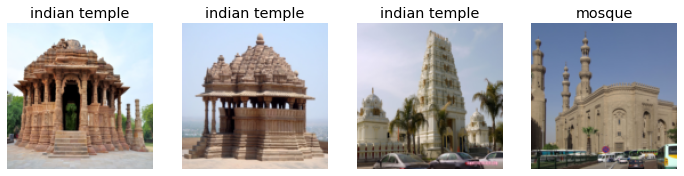

In [53]:
woorships = worships.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = worships.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

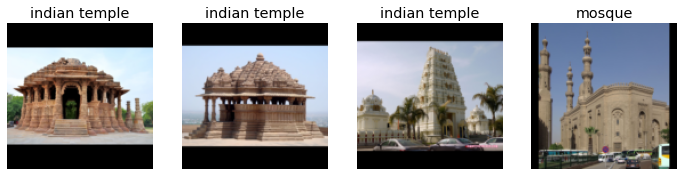

In [54]:
worships = worships.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = worships.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

All of these approaches seem somewhat wasteful, or problematic. If we squish or stretch the images they end up as unrealistic shapes, leading to a model that learns that things look different to how they actually are, which we would expect to result in lower accuracy. If we crop the images then we remove some of the features that allow us to perform recognition. For instance, if we were trying to recognize breeds of dog or cat, we might end up cropping out a key part of the body or the face necessary to distinguish between similar breeds. If we pad the images then we have a whole lot of empty space, which is just wasted computation for our model and results in a lower effective resolution for the part of the image we actually use.

Instead, what we normally do in practice is to randomly select part of the image, and crop to just that part. On each epoch (which is one complete pass through all of our images in the dataset) we randomly select a different part of each image. This means that our model can learn to focus on, and recognize, different features in our images. It also reflects how images work in the real world: different photos of the same thing may be framed in slightly different ways.

In fact, an entirely untrained neural network knows nothing whatsoever about how images behave. It doesn't even recognize that when an object is rotated by one degree, it still is a picture of the same thing! So actually training the neural network with examples of images where the objects are in slightly different places and slightly different sizes helps it to understand the basic concept of what an object is, and how it can be represented in an image.

Here's another example where we replace `Resize` with `RandomResizedCrop`, which is the transform that provides the behavior we just described. The most important parameter to pass in is `min_scale`, which determines how much of the image to select at minimum each time:

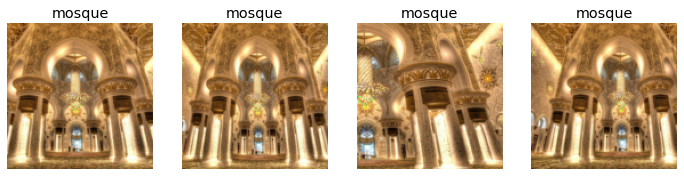

In [57]:
worships = worships.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = worships.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

We used `unique=True` to have the same image repeated with different versions of this `RandomResizedCrop` transform. This is a specific example of a more general technique, called data augmentation.

### Data Augmentation

*Data augmentation* refers to creating random variations of our input data, such that they appear different, but do not actually change the meaning of the data. Examples of common data augmentation techniques for images are rotation, flipping, perspective warping, brightness changes and contrast changes. For natural photo images such as the ones we are using here, a standard set of augmentations that we have found work pretty well are provided with the `aug_transforms` function. Because our images are now all the same size, we can apply these augmentations to an entire batch of them using the GPU, which will save a lot of time. To tell fastai we want to use these transforms on a batch, we use the `batch_tfms` parameter (note that we're not using `RandomResizedCrop` in this example, so you can see the differences more clearly; we're also using double the amount of augmentation compared to the default, for the same reason):

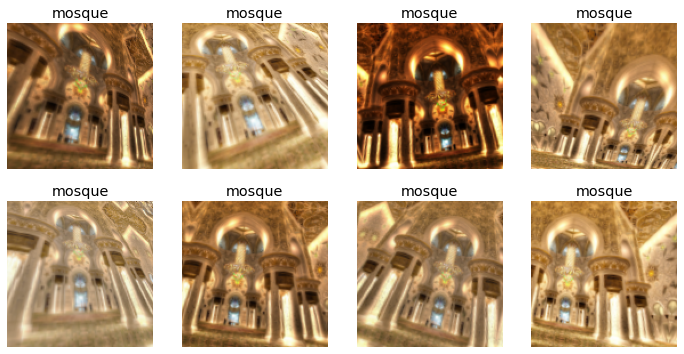

In [58]:
worships = worships.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = worships.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

Now that we have assembled our data in a format fit for model training, let's actually train an image classifier using it.

## Training Your Model, and Using It to Clean Your Data

Time to use the same lines of code as in <<chapter_intro>> to train our bear classifier.

We don't have a lot of data for our problem (150 pictures of each sort of bear at most), so to train our model, we'll use `RandomResizedCrop` with an image size of 224 px, which is fairly standard for image classification, and default `aug_transforms`:

In [59]:
worships = worships.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = worships.dataloaders(path)

We can now create our `Learner` and fine-tune it in the usual way:

In [60]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.627682,1.181626,0.375000,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.702076,0.506720,0.193182,00:10
1,0.559433,0.445579,0.136364,00:11
2,0.433978,0.386611,0.113636,00:10
3,0.346796,0.341341,0.136364,00:10


Now let's see whether the mistakes the model is making are mainly thinking that grizzlies are teddies (that would be bad for safety!), or that grizzlies are black bears, or something else. To visualize this, we can create a *confusion matrix*:

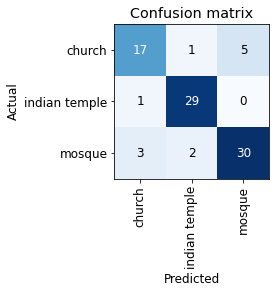

In [61]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

The rows represent all the black, grizzly, and teddy bears in our dataset, respectively. The columns represent the images which the model predicted as black, grizzly, and teddy bears, respectively. Therefore, the diagonal of the matrix shows the images which were classified correctly, and the off-diagonal cells represent those which were classified incorrectly. This is one of the many ways that fastai allows you to view the results of your model. It is (of course!) calculated using the validation set. With the color-coding, the goal is to have white everywhere except the diagonal, where we want dark blue. Our bear classifier isn't making many mistakes!

It's helpful to see where exactly our errors are occurring, to see whether they're due to a dataset problem (e.g., images that aren't bears at all, or are labeled incorrectly, etc.), or a model problem (perhaps it isn't handling images taken with unusual lighting, or from a different angle, etc.). To do this, we can sort our images by their *loss*.

The loss is a number that is higher if the model is incorrect (especially if it's also confident of its incorrect answer), or if it's correct, but not confident of its correct answer. In a couple of chapters we'll learn in depth how loss is calculated and used in the training process. For now, `plot_top_losses` shows us the images with the highest loss in our dataset. As the title of the output says, each image is labeled with four things: prediction, actual (target label), loss, and probability. The *probability* here is the confidence level, from zero to one, that the model has assigned to its prediction:

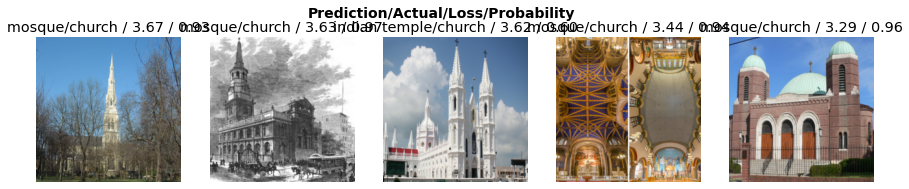

In [62]:
interp.plot_top_losses(5, nrows=1)

This output shows that the image with the highest loss is one that has been predicted as "grizzly" with high confidence. However, it's labeled (based on our Bing image search) as "black." We're not bear experts, but it sure looks to us like this label is incorrect! We should probably change its label to "grizzly."

The intuitive approach to doing data cleaning is to do it *before* you train a model. But as you've seen in this case, a model can actually help you find data issues more quickly and easily. So, we normally prefer to train a quick and simple model first, and then use it to help us with data cleaning.

fastai includes a handy GUI for data cleaning called `ImageClassifierCleaner` that allows you to choose a category and the training versus validation set and view the highest-loss images (in order), along with menus to allow images to be selected for removal or relabeling:

In [63]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

<img alt="Cleaner widget" width="700" src="images/att_00007.png">

In [ ]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

We can see that amongst our "black bears" is an image that contains two bears: one grizzly, one black. So, we should choose `<Delete>` in the menu under this image. `ImageClassifierCleaner` doesn't actually do the deleting or changing of labels for you; it just returns the indices of items to change. So, for instance, to delete (`unlink`) all images selected for deletion, we would run:

```python
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
```

To move images for which we've selected a different category, we would run:

```python
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
```

> s: Cleaning the data and getting it ready for your model are two of the biggest challenges for data scientists; they say it takes 90% of their time. The fastai library aims to provide tools that make it as easy as possible.

We'll be seeing more examples of model-driven data cleaning throughout this book. Once we've cleaned up our data, we can retrain our model. Try it yourself, and see if your accuracy improves!

> note: No Need for Big Data: After cleaning the dataset using these steps, we generally are seeing 100% accuracy on this task. We even see that result when we download a lot fewer images than the 150 per class we're using here. As you can see, the common complaint that _you need massive amounts of data to do deep learning_ can be a very long way from the truth!

Now that we have trained our model, let's see how we can deploy it to be used in practice.

## Turning Your Model into an Online Application

We are now going to look at what it takes to turn this model into a working online application. We will just go as far as creating a basic working prototype; we do not have the scope in this book to teach you all the details of web application development generally.

### Using the Model for Inference

Once you've got a model you're happy with, you need to save it, so that you can then copy it over to a server where you'll use it in production. Remember that a model consists of two parts: the *architecture* and the trained *parameters*. The easiest way to save the model is to save both of these, because that way when you load a model you can be sure that you have the matching architecture and parameters. To save both parts, use the `export` method.

This method even saves the definition of how to create your `DataLoaders`. This is important, because otherwise you would have to redefine how to transform your data in order to use your model in production. fastai automatically uses your validation set `DataLoader` for inference by default, so your data augmentation will not be applied, which is generally what you want.

When you call `export`, fastai will save a file called "export.pkl":

In [64]:
learn.export()

Let's check that the file exists, by using the `ls` method that fastai adds to Python's `Path` class:

In [65]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

You'll need this file wherever you deploy your app to. For now, let's try to create a simple app within our notebook.

When we use a model for getting predictions, instead of training, we call it *inference*. To create our inference learner from the exported file, we use `load_learner` (in this case, this isn't really necessary, since we already have a working `Learner` in our notebook; we're just doing it here so you can see the whole process end-to-end):

In [66]:
learn_inf = load_learner(path/'export.pkl')

When we're doing inference, we're generally just getting predictions for one image at a time. To do this, pass a filename to `predict`:

In [67]:
learn_inf.predict('images/PeriyaKovil.jpeg')

('indian temple', tensor(1), tensor([3.1846e-04, 9.9967e-01, 1.2276e-05]))

This has returned three things: the predicted category in the same format you originally provided (in this case that's a string), the index of the predicted category, and the probabilities of each category. The last two are based on the order of categories in the *vocab* of the `DataLoaders`; that is, the stored list of all possible categories. At inference time, you can access the `DataLoaders` as an attribute of the `Learner`:

In [68]:
learn_inf.dls.vocab

(#3) ['church','indian temple','mosque']

We can see here that if we index into the vocab with the integer returned by `predict` then we get back "grizzly," as expected. Also, note that if we index into the list of probabilities, we see a nearly 1.00 probability that this is a grizzly.

We know how to make predictions from our saved model, so we have everything we need to start building our app. We can do it directly in a Jupyter notebook.

### Creating a Notebook App from the Model

To use our model in an application, we can simply treat the `predict` method as a regular function. Therefore, creating an app from the model can be done using any of the myriad of frameworks and techniques available to application developers.

However, most data scientists are not familiar with the world of web application development. So let's try using something that you do, at this point, know: it turns out that we can create a complete working web application using nothing but Jupyter notebooks! The two things we need to make this happen are:

- IPython widgets (ipywidgets)
- Voilà

*IPython widgets* are GUI components that bring together JavaScript and Python functionality in a web browser, and can be created and used within a Jupyter notebook. For instance, the image cleaner that we saw earlier in this chapter is entirely written with IPython widgets. However, we don't want to require users of our application to run Jupyter themselves.

That is why *Voilà* exists. It is a system for making applications consisting of IPython widgets available to end users, without them having to use Jupyter at all. Voilà is taking advantage of the fact that a notebook _already is_ a kind of web application, just a rather complex one that depends on another web application: Jupyter itself. Essentially, it helps us automatically convert the complex web application we've already implicitly made (the notebook) into a simpler, easier-to-deploy web application, which functions like a normal web application rather than like a notebook.

But we still have the advantage of developing in a notebook, so with ipywidgets, we can build up our GUI step by step. We will use this approach to create a simple image classifier. First, we need a file upload widget:

In [69]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

<img alt="An upload button" width="159" src="images/att_00008.png">

Now we can grab the image:

In [71]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['images/grizzly.jpg'])

In [72]:
img = PILImage.create(btn_upload.data[-1])

<img alt="Output widget representing the image" width="117" src="images/att_00009.png">

We can use an `Output` widget to display it:

In [73]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

<img alt="Output widget representing the image" width="117" src="images/att_00009.png">

Then we can get our predictions:

In [74]:
pred,pred_idx,probs = learn_inf.predict(img)

and use a `Label` to display them:

In [75]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: indian temple; Probability: 0.9984')

`Prediction: grizzly; Probability: 1.0000`

We'll need a button to do the classification. It looks exactly like the upload button:

In [76]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

We'll also need a *click event handler*; that is, a function that will be called when it's pressed. We can just copy over the lines of code from above:

In [77]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

You can test the button now by pressing it, and you should see the image and predictions update automatically!

We can now put them all in a vertical box (`VBox`) to complete our GUI:

In [78]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [79]:
#hide_output
VBox([widgets.Label('Select your place of worship!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

<img alt="The whole widget" width="233" src="images/att_00011.png">

We have written all the code necessary for our app. The next step is to convert it into something we can deploy.

### Turning Your Notebook into a Real App

In [80]:
#hide
!pip install voila
!jupyter serverextension enable voila —sys-prefix

     |████████████████████████████████| 6.9 MB 10.4 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 552 kB 46.8 MB/s eta 0:00:01
     |████████████████████████████████| 208 kB 43.0 MB/s eta 0:00:01
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

nbdev 1.0.18 requires nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
Enabling: voila
- Writing config: /root/.jupyter
    - Validating...
      voila 0.2.3 OK
Enabling: —sys-prefix
- Writing config: /root/.jupyter
    - Validating...
Error loadi

Now that we have everything working in this Jupyter notebook, we can create our application. To do this, start a new notebook and add to it only the code needed to create and show the widgets that you need, and markdown for any text that you want to appear. Have a look at the *bear_classifier* notebook in the book's repo to see the simple notebook application we created.

Next, install Voilà if you haven't already, by copying these lines into a notebook cell and executing it:

    !pip install voila
    !jupyter serverextension enable voila —sys-prefix

Cells that begin with a `!` do not contain Python code, but instead contain code that is passed to your shell (bash, Windows PowerShell, etc.). If you are comfortable using the command line, which we'll discuss more later in this book, you can of course simply type these two lines (without the `!` prefix) directly into your terminal. In this case, the first line installs the `voila` library and application, and the second connects it to your existing Jupyter notebook.

Voilà runs Jupyter notebooks just like the Jupyter notebook server you are using now does, but it also does something very important: it removes all of the cell inputs, and only shows output (including ipywidgets), along with your markdown cells. So what's left is a web application! To view your notebook as a Voilà web application, replace the word "notebooks" in your browser's URL with: "voila/render". You will see the same content as your notebook, but without any of the code cells.

Of course, you don't need to use Voilà or ipywidgets. Your model is just a function you can call (`pred,pred_idx,probs = learn.predict(img)`), so you can use it with any framework, hosted on any platform. And you can take something you've prototyped in ipywidgets and Voilà and later convert it into a regular web application. We're showing you this approach in the book because we think it's a great way for data scientists and other folks that aren't web development experts to create applications from their models.

We have our app, now let's deploy it!

### Deploying your app

As you now know, you need a GPU to train nearly any useful deep learning model. So, do you need a GPU to use that model in production? No! You almost certainly *do not need a GPU to serve your model in production*. There are a few reasons for this:

- As we've seen, GPUs are only useful when they do lots of identical work in parallel. If you're doing (say) image classification, then you'll normally be classifying just one user's image at a time, and there isn't normally enough work to do in a single image to keep a GPU busy for long enough for it to be very efficient. So, a CPU will often be more cost-effective.
- An alternative could be to wait for a few users to submit their images, and then batch them up and process them all at once on a GPU. But then you're asking your users to wait, rather than getting answers straight away! And you need a high-volume site for this to be workable. If you do need this functionality, you can use a tool such as Microsoft's [ONNX Runtime](https://github.com/microsoft/onnxruntime), or [AWS Sagemaker](https://aws.amazon.com/sagemaker/)
- The complexities of dealing with GPU inference are significant. In particular, the GPU's memory will need careful manual management, and you'll need a careful queueing system to ensure you only process one batch at a time.
- There's a lot more market competition in CPU than GPU servers, as a result of which there are much cheaper options available for CPU servers.

Because of the complexity of GPU serving, many systems have sprung up to try to automate this. However, managing and running these systems is also complex, and generally requires compiling your model into a different form that's specialized for that system. It's typically preferable to avoid dealing with this complexity until/unless your app gets popular enough that it makes clear financial sense for you to do so.

For at least the initial prototype of your application, and for any hobby projects that you want to show off, you can easily host them for free. The best place and the best way to do this will vary over time, so check the [book's website](https://book.fast.ai/) for the most up-to-date recommendations. As we're writing this book in early 2020 the simplest (and free!) approach is to use [Binder](https://mybinder.org/). To publish your web app on Binder, you follow these steps:

1. Add your notebook to a [GitHub repository](http://github.com/).
2. Paste the URL of that repo into Binder's URL, as shown in <<deploy-binder>>.
3. Change the File dropdown to instead select URL.
4. In the "URL to open" field, enter `/voila/render/name.ipynb` (replacing `name` with the name of for your notebook).
5. Click the clickboard button at the bottom right to copyt the URL and paste it somewhere safe. 
6. Click Launch.

<img alt="Deploying to Binder" width="800" caption="Deploying to Binder" id="deploy-binder" src="images/att_00001.png">

The first time you do this, Binder will take around 5 minutes to build your site. Behind the scenes, it is finding a virtual machine that can run your app, allocating storage, collecting the files needed for Jupyter, for your notebook, and for presenting your notebook as a web application.

Finally, once it has started the app running, it will navigate your browser to your new web app. You can share the URL you copied to allow others to access your app as well.

For other (both free and paid) options for deploying your web app, be sure to take a look at the [book's website](https://book.fast.ai/).

You may well want to deploy your application onto mobile devices, or edge devices such as a Raspberry Pi. There are a lot of libraries and frameworks that allow you to integrate a model directly into a mobile application. However, these approaches tend to require a lot of extra steps and boilerplate, and do not always support all the PyTorch and fastai layers that your model might use. In addition, the work you do will depend on what kind of mobile devices you are targeting for deployment—you might need to do some work to run on iOS devices, different work to run on newer Android devices, different work for older Android devices, etc. Instead, we recommend wherever possible that you deploy the model itself to a server, and have your mobile or edge application connect to it as a web service.

There are quite a few upsides to this approach. The initial installation is easier, because you only have to deploy a small GUI application, which connects to the server to do all the heavy lifting. More importantly perhaps, upgrades of that core logic can happen on your server, rather than needing to be distributed to all of your users. Your server will have a lot more memory and processing capacity than most edge devices, and it is far easier to scale those resources if your model becomes more demanding. The hardware that you will have on a server is also going to be more standard and more easily supported by fastai and PyTorch, so you don't have to compile your model into a different form.

There are downsides too, of course. Your application will require a network connection, and there will be some latency each time the model is called. (It takes a while for a neural network model to run anyway, so this additional network latency may not make a big difference to your users in practice. In fact, since you can use better hardware on the server, the overall latency may even be less than if it were running locally!) Also, if your application uses sensitive data then your users may be concerned about an approach which sends that data to a remote server, so sometimes privacy considerations will mean that you need to run the model on the edge device (it may be possible to avoid this by having an *on-premise* server, such as inside a company's firewall). Managing the complexity and scaling the server can create additional overhead too, whereas if your model runs on the edge devices then each user is bringing their own compute resources, which leads to easier scaling with an increasing number of users (also known as *horizontal scaling*).

> A: I've had a chance to see up close how the mobile ML landscape is changing in my work. We offer an iPhone app that depends on computer vision, and for years we ran our own computer vision models in the cloud. This was the only way to do it then since those models needed significant memory and compute resources and took minutes to process inputs. This approach required building not only the models (fun!) but also the infrastructure to ensure a certain number of "compute worker machines" were absolutely always running (scary), that more machines would automatically come online if traffic increased, that there was stable storage for large inputs and outputs, that the iOS app could know and tell the user how their job was doing, etc. Nowadays Apple provides APIs for converting models to run efficiently on device and most iOS devices have dedicated ML hardware, so that's the strategy we use for our newer models. It's still not easy but in our case it's worth it, for a faster user experience and to worry less about servers. What works for you will depend, realistically, on the user experience you're trying to create and what you personally find is easy to do. If you really know how to run servers, do it. If you really know how to build native mobile apps, do that. There are many roads up the hill.

Overall, we'd recommend using a simple CPU-based server approach where possible, for as long as you can get away with it. If you're lucky enough to have a very successful application, then you'll be able to justify the investment in more complex deployment approaches at that time.

Congratulations, you have successfully built a deep learning model and deployed it! Now is a good time to take a pause and think about what could go wrong.

## How to Avoid Disaster

In practice, a deep learning model will be just one piece of a much bigger system. As we discussed at the start of this chapter, a data product requires thinking about the entire end-to-end process, from conception to use in production. In this book, we can't hope to cover all the complexity of managing deployed data products, such as managing multiple versions of models, A/B testing, canarying, refreshing the data (should we just grow and grow our datasets all the time, or should we regularly remove some of the old data?), handling data labeling, monitoring all this, detecting model rot, and so forth. In this section we will give an overview of some of the most important issues to consider; for a more detailed discussion of deployment issues we refer to you to the excellent [Building Machine Learning Powered Applications](http://shop.oreilly.com/product/0636920215912.do) by Emmanuel Ameisen (O'Reilly)

One of the biggest issues to consider is that understanding and testing the behavior of a deep learning model is much more difficult than with most other code you write. With normal software development you can analyze the exact steps that the software is taking, and carefully study which of these steps match the desired behavior that you are trying to create. But with a neural network the behavior emerges from the model's attempt to match the training data, rather than being exactly defined.

This can result in disaster! For instance, let's say we really were rolling out a bear detection system that will be attached to video cameras around campsites in national parks, and will warn campers of incoming bears. If we used a model trained with the dataset we downloaded there would be all kinds of problems in practice, such as:

- Working with video data instead of images
- Handling nighttime images, which may not appear in this dataset
- Dealing with low-resolution camera images
- Ensuring results are returned fast enough to be useful in practice
- Recognizing bears in positions that are rarely seen in photos that people post online (for example from behind, partially covered by bushes, or when a long way away from the camera)

A big part of the issue is that the kinds of photos that people are most likely to upload to the internet are the kinds of photos that do a good job of clearly and artistically displaying their subject matter—which isn't the kind of input this system is going to be getting. So, we may need to do a lot of our own data collection and labelling to create a useful system.

This is just one example of the more general problem of *out-of-domain* data. That is to say, there may be data that our model sees in production which is very different to what it saw during training. There isn't really a complete technical solution to this problem; instead, we have to be careful about our approach to rolling out the technology.

There are other reasons we need to be careful too. One very common problem is *domain shift*, where the type of data that our model sees changes over time. For instance, an insurance company may use a deep learning model as part of its pricing and risk algorithm, but over time the types of customers that the company attracts, and the types of risks they represent, may change so much that the original training data is no longer relevant.

Out-of-domain data and domain shift are examples of a larger problem: that you can never fully understand the entire behaviour of your neural network. They have far too many parameters to be able to analytically understand all of their possible behaviors. This is the natural downside of their best feature—their flexibility, which enables them to solve complex problems where we may not even be able to fully specify our preferred solution approaches. The good news, however, is that there are ways to mitigate these risks using a carefully thought-out process. The details of this will vary depending on the details of the problem you are solving, but we will attempt to lay out here a high-level approach, summarized in <<deploy_process>>, which we hope will provide useful guidance.

<img alt="Deployment process" width="500" caption="Deployment process" id="deploy_process" src="images/att_00061.png">

Where possible, the first step is to use an entirely manual process, with your deep learning model approach running in parallel but not being used directly to drive any actions. The humans involved in the manual process should look at the deep learning outputs and check whether they make sense. For instance, with our bear classifier a park ranger could have a screen displaying video feeds from all the cameras, with any possible bear sightings simply highlighted in red. The park ranger would still be expected to be just as alert as before the model was deployed; the model is simply helping to check for problems at this point.

The second step is to try to limit the scope of the model, and have it carefully supervised by people. For instance, do a small geographically and time-constrained trial of the model-driven approach. Rather than rolling our bear classifier out in every national park throughout the country, we could pick a single observation post, for a one-week period, and have a park ranger check each alert before it goes out.

Then, gradually increase the scope of your rollout. As you do so, ensure that you have really good reporting systems in place, to make sure that you are aware of any significant changes to the actions being taken compared to your manual process. For instance, if the number of bear alerts doubles or halves after rollout of the new system in some location, we should be very concerned. Try to think about all the ways in which your system could go wrong, and then think about what measure or report or picture could reflect that problem, and ensure that your regular reporting includes that information.

> J: I started a company 20 years ago called _Optimal Decisions_ that used machine learning and optimization to help giant insurance companies set their pricing, impacting tens of billions of dollars of risks. We used the approaches described here to manage the potential downsides of something going wrong. Also, before we worked with our clients to put anything in production, we tried to simulate the impact by testing the end-to-end system on their previous year's data. It was always quite a nerve-wracking process, putting these new algorithms into production, but every rollout was successful.

### Unforeseen Consequences and Feedback Loops

One of the biggest challenges in rolling out a model is that your model may change the behaviour of the system it is a part of. For instance, consider a "predictive policing" algorithm that predicts more crime in certain neighborhoods, causing more police officers to be sent to those neighborhoods, which can result in more crimes being recorded in those neighborhoods, and so on. In the Royal Statistical Society paper ["To Predict and Serve?"](https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1740-9713.2016.00960.x), Kristian Lum and William Isaac observe that: "predictive policing is aptly named: it is predicting future policing, not future crime."

Part of the issue in this case is that in the presence of bias (which we'll discuss in depth in the next chapter), *feedback loops* can result in negative implications of that bias getting worse and worse. For instance, there are concerns that this is already happening in the US, where there is significant bias in arrest rates on racial grounds. [According to the ACLU](https://www.aclu.org/issues/smart-justice/sentencing-reform/war-marijuana-black-and-white), "despite roughly equal usage rates, Blacks are 3.73 times more likely than whites to be arrested for marijuana." The impact of this bias, along with the rollout of predictive policing algorithms in many parts of the US, led Bärí Williams to [write in the *New York Times*](https://www.nytimes.com/2017/12/02/opinion/sunday/intelligent-policing-and-my-innocent-children.html): "The same technology that’s the source of so much excitement in my career is being used in law enforcement in ways that could mean that in the coming years, my son, who is 7 now, is more likely to be profiled or arrested—or worse—for no reason other than his race and where we live."

A helpful exercise prior to rolling out a significant machine learning system is to consider this question: "What would happen if it went really, really well?" In other words, what if the predictive power was extremely high, and its ability to influence behavior was extremely significant? In that case, who would be most impacted? What would the most extreme results potentially look like? How would you know what was really going on?

Such a thought exercise might help you to construct a more careful rollout plan, with ongoing monitoring systems and human oversight. Of course, human oversight isn't useful if it isn't listened to, so make sure that there are reliable and resilient communication channels so that the right people will be aware of issues, and will have the power to fix them.

## Get Writing!

One of the things our students have found most helpful to solidify their understanding of this material is to write it down. There is no better test of your understanding of a topic than attempting to teach it to somebody else. This is helpful even if you never show your writing to anybody—but it's even better if you share it! So we recommend that, if you haven't already, you start a blog. Now that you've completed Chapter 2 and have learned how to train and deploy models, you're well placed to write your first blog post about your deep learning journey. What's surprised you? What opportunities do you see for deep learning in your field? What obstacles do you see?

Rachel Thomas, cofounder of fast.ai, wrote in the article ["Why You (Yes, You) Should Blog"](https://medium.com/@racheltho/why-you-yes-you-should-blog-7d2544ac1045):

```asciidoc
____
The top advice I would give my younger self would be to start blogging sooner. Here are some reasons to blog:

* It’s like a resume, only better. I know of a few people who have had blog posts lead to job offers!
* Helps you learn. Organizing knowledge always helps me synthesize my own ideas. One of the tests of whether you understand something is whether you can explain it to someone else. A blog post is a great way to do that.
* I’ve gotten invitations to conferences and invitations to speak from my blog posts. I was invited to the TensorFlow Dev Summit (which was awesome!) for writing a blog post about how I don’t like TensorFlow.
* Meet new people. I’ve met several people who have responded to blog posts I wrote.
* Saves time. Any time you answer a question multiple times through email, you should turn it into a blog post, which makes it easier for you to share the next time someone asks.
____
```

Perhaps her most important tip is this: 

> : You are best positioned to help people one step behind you. The material is still fresh in your mind. Many experts have forgotten what it was like to be a beginner (or an intermediate) and have forgotten why the topic is hard to understand when you first hear it. The context of your particular background, your particular style, and your knowledge level will give a different twist to what you’re writing about.

We've provided full details on how to set up a blog in <<appendix_blog>>. If you don't have a blog already, take a look at that now, because we've got a really great approach set up for you to start blogging for free, with no ads—and you can even use Jupyter Notebook!

## Questionnaire

1. Provide an example of where the bear classification model might work poorly in production, due to structural or style differences in the training data.
1. Where do text models currently have a major deficiency?
1. What are possible negative societal implications of text generation models?
1. In situations where a model might make mistakes, and those mistakes could be harmful, what is a good alternative to automating a process?
1. What kind of tabular data is deep learning particularly good at?
1. What's a key downside of directly using a deep learning model for recommendation systems?
1. What are the steps of the Drivetrain Approach?
1. How do the steps of the Drivetrain Approach map to a recommendation system?
1. Create an image recognition model using data you curate, and deploy it on the web.
1. What is `DataLoaders`?
1. What four things do we need to tell fastai to create `DataLoaders`?
1. What does the `splitter` parameter to `DataBlock` do?
1. How do we ensure a random split always gives the same validation set?
1. What letters are often used to signify the independent and dependent variables?
1. What's the difference between the crop, pad, and squish resize approaches? When might you choose one over the others?
1. What is data augmentation? Why is it needed?
1. What is the difference between `item_tfms` and `batch_tfms`?
1. What is a confusion matrix?
1. What does `export` save?
1. What is it called when we use a model for getting predictions, instead of training?
1. What are IPython widgets?
1. When might you want to use CPU for deployment? When might GPU be better?
1. What are the downsides of deploying your app to a server, instead of to a client (or edge) device such as a phone or PC?
1. What are three examples of problems that could occur when rolling out a bear warning system in practice?
1. What is "out-of-domain data"?
1. What is "domain shift"?
1. What are the three steps in the deployment process?

### Further Research

1. Consider how the Drivetrain Approach maps to a project or problem you're interested in.
1. When might it be best to avoid certain types of data augmentation?
1. For a project you're interested in applying deep learning to, consider the thought experiment "What would happen if it went really, really well?"
1. Start a blog, and write your first blog post. For instance, write about what you think deep learning might be useful for in a domain you're interested in.